In [1]:
'''
PROBLEM STATEMENT:

Create a K-means clustering algorithm to group customers of a retail store based on their purchase history."
'''

'\nPROBLEM STATEMENT:\n\nCreate a K-means clustering algorithm to group customers of a retail store based on their purchase history."\n'

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [3]:
#Load the data
data = pd.read_csv('Mall_Customers.csv')

In [4]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
# Check for null values
data.isnull().sum().sum()

0

Text(0, 0.5, 'annual income')

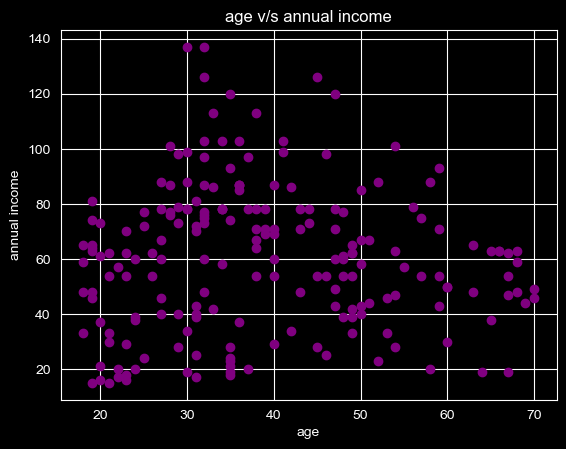

In [8]:
# Visualize 
plt.style.use('dark_background')
plt.scatter(data['Age'],data['Annual Income (k$)'],color='purple')
plt.title('age v/s annual income')
plt.xlabel('age')
plt.ylabel('annual income')

Text(0, 0.5, 'annual income')

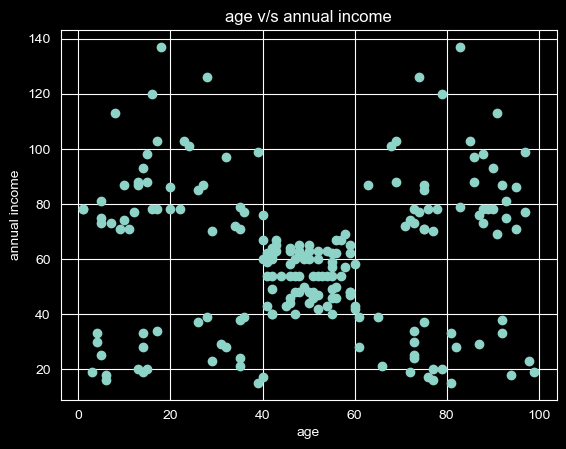

In [9]:
plt.style.use('dark_background')
plt.scatter(data['Spending Score (1-100)'],data['Annual Income (k$)'])
plt.title('age v/s annual income')
plt.xlabel('age')
plt.ylabel('annual income')

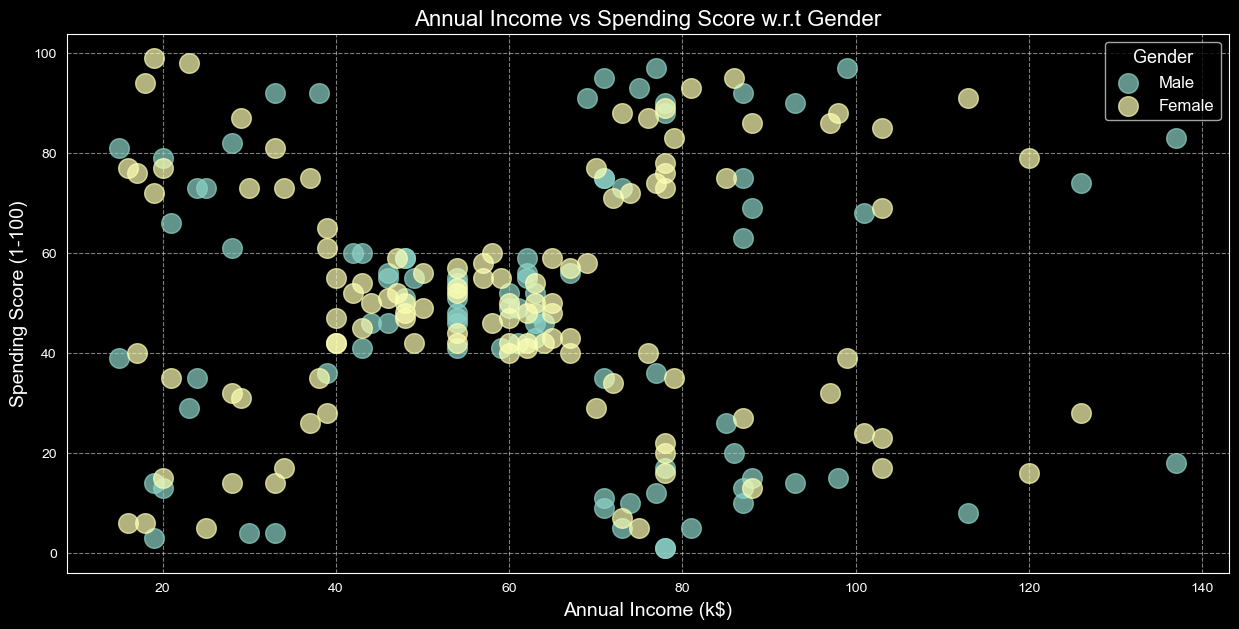

In [10]:
plt.style.use('dark_background')

plt.figure(1, figsize=(15, 7))
for gender in ['Male', 'Female']:
    plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)',
                data=data[data['Gender'] == gender], s=200, alpha=0.7, label=gender)
    
plt.xlabel('Annual Income (k$)', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)
plt.title('Annual Income vs Spending Score w.r.t Gender', fontsize=16)
plt.legend(title='Gender', title_fontsize='13', fontsize='12')

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [11]:
X = data.iloc[:,3:5].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [12]:
n_clusters = range(2, 10)
wcss = []
silhouette_scores = []

# Add `for` loop to train model and calculate WCSS and silhouette score
for k in n_clusters:
    model = KMeans(n_clusters=k, random_state=42)
    # Train the model
    model.fit(X)
    # Calculate WCSS
    wcss.append(model.inertia_)
    # Calculate Silhouette Score
    silhouette_scores.append(silhouette_score(X, model.labels_))

print('WCSS:', wcss[:6])
print()
print('Silhouette Scores:', silhouette_scores[:6])


WCSS: [183653.32894736843, 106348.37306211118, 73880.64496247194, 44448.45544793371, 40825.16946386946, 33642.579220779226]

Silhouette Scores: [0.39564531743995546, 0.46761358158775435, 0.4937945814354117, 0.553931997444648, 0.5128405328004378, 0.5017174409749505]


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

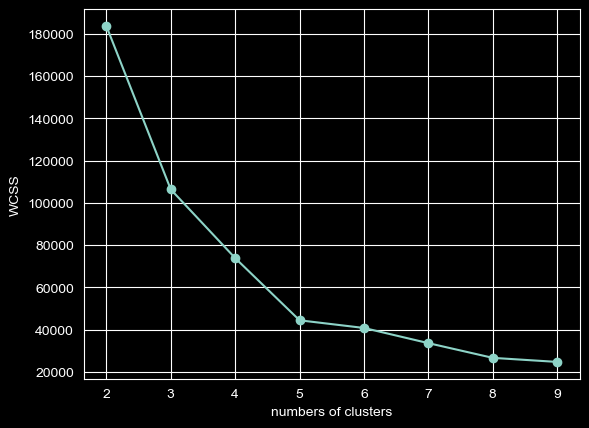

In [13]:
plt.plot(range(2,10),wcss,marker='o')
plt.xlabel('numbers of clusters')
plt.ylabel('WCSS')
plt.show()

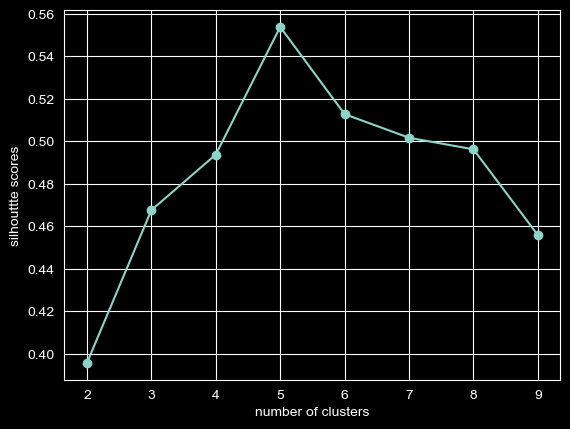

In [14]:
plt.plot(range(2,10),silhouette_scores,marker='o')
plt.xlabel('number of clusters')
plt.ylabel('silhouttte scores')
plt.show()

In [15]:
Fmodel = KMeans(n_clusters=5,random_state=101)
Fmodel.fit(X)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=101)

In [16]:
ypred = Fmodel.predict(X)

In [17]:
ypred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

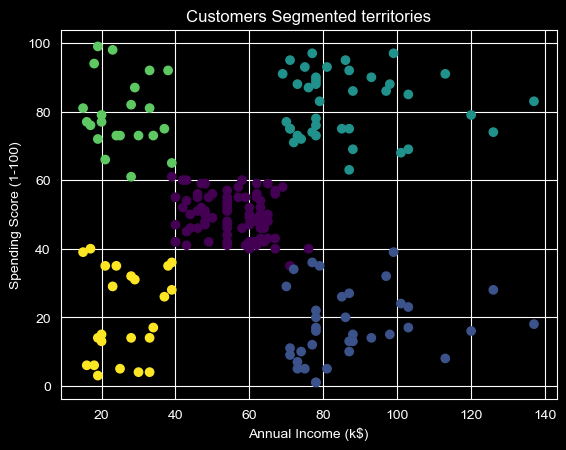

In [18]:
plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'],c=ypred,cmap='viridis')
plt.title('Customers Segmented territories')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()
